In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/cats_vs_dogs_small.zip

Archive:  /content/drive/MyDrive/cats_vs_dogs_small.zip
   creating: cats_vs_dogs_small/
   creating: cats_vs_dogs_small/test/
   creating: cats_vs_dogs_small/test/cats/
  inflating: cats_vs_dogs_small/test/cats/1500.jpg  
  inflating: cats_vs_dogs_small/test/cats/1501.jpg  
  inflating: cats_vs_dogs_small/test/cats/1502.jpg  
  inflating: cats_vs_dogs_small/test/cats/1503.jpg  
  inflating: cats_vs_dogs_small/test/cats/1504.jpg  
  inflating: cats_vs_dogs_small/test/cats/1505.jpg  
  inflating: cats_vs_dogs_small/test/cats/1506.jpg  
  inflating: cats_vs_dogs_small/test/cats/1507.jpg  
  inflating: cats_vs_dogs_small/test/cats/1508.jpg  
  inflating: cats_vs_dogs_small/test/cats/1509.jpg  
  inflating: cats_vs_dogs_small/test/cats/1510.jpg  
  inflating: cats_vs_dogs_small/test/cats/1511.jpg  
  inflating: cats_vs_dogs_small/test/cats/1512.jpg  
  inflating: cats_vs_dogs_small/test/cats/1513.jpg  
  inflating: cats_vs_dogs_small/test/cats/1514.jpg  
  inflating: cats_vs_dogs_small/tes

In [3]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

In [4]:
base_dir = "/content/cats_vs_dogs_small"

full_train_ds = image_dataset_from_directory(
    os.path.join(base_dir, "train"),
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=123
)

validation_ds = image_dataset_from_directory(
    os.path.join(base_dir, "validation"),
    image_size=(180, 180),
    batch_size=32
)

test_ds = image_dataset_from_directory(
    os.path.join(base_dir, "test"),
    image_size=(180, 180),
    batch_size=32
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


# CNN from Scratch – 1000 Samples

In [5]:
train_ds = full_train_ds.take(32)  # ~1024 samples

model = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(train_ds, epochs=20, validation_data=validation_ds)
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy CNN 1000 samples: {test_acc:.3f}")


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.5069 - loss: 0.7778 - val_accuracy: 0.5800 - val_loss: 0.6923
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.5254 - loss: 0.6940 - val_accuracy: 0.4990 - val_loss: 0.7011
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.5179 - loss: 0.6975 - val_accuracy: 0.5210 - val_loss: 0.6896
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5649 - loss: 0.6878 - val_accuracy: 0.5820 - val_loss: 0.6805
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5501 - loss: 0.6816 - val_accuracy: 0.5670 - val_loss: 0.6785
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.5863 - loss: 0.6668 - val_accuracy: 0.5850 - val_loss: 0.6771
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.5630 - loss: 0.6883 - val_accuracy: 0.5360 - val_loss: 0.6905
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.5816 - loss: 0.6949 - val_accuracy: 0.6330 

# Plot CNN Accuracy (1000 samples)

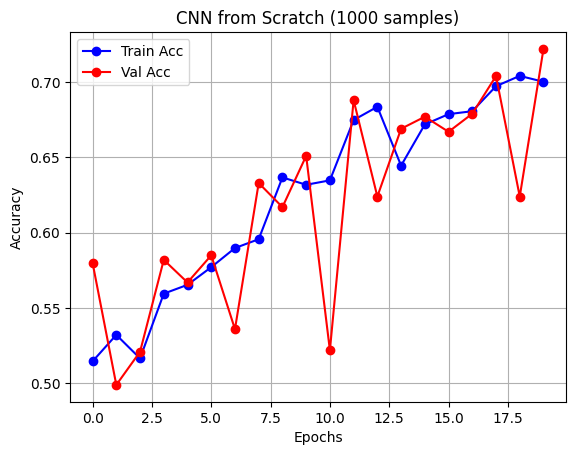

In [6]:
plt.plot(history.history['accuracy'], 'bo-', label="Train Acc")
plt.plot(history.history['val_accuracy'], 'ro-', label="Val Acc")
plt.title("CNN from Scratch (1000 samples)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# CNN - 1500 Samples

In [7]:
train_ds = full_train_ds.take(47)  # ~1500 samples

model = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(train_ds, epochs=20, validation_data=validation_ds)
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy CNN 1500 samples: {test_acc:.3f}")

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.4901 - loss: 0.7324 - val_accuracy: 0.6070 - val_loss: 0.6917
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.5212 - loss: 0.6923 - val_accuracy: 0.6180 - val_loss: 0.6899
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5771 - loss: 0.6927 - val_accuracy: 0.5160 - val_loss: 0.6832
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5455 - loss: 0.6887 - val_accuracy: 0.6690 - val_loss: 0.6462
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6303 - loss: 0.6587 - val_accuracy: 0.6260 - val_loss: 0.6337
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.6110 - loss: 0.6578 - val_accuracy: 0.5060 - val_loss: 0.9313
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.6277 - loss: 0.6649 - val_accuracy: 0.6660 - val_loss: 0.5998
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6707 - loss: 0.6171 - val_accuracy: 0.6140 - v

# Plot CNN Accuracy (1500 samples)

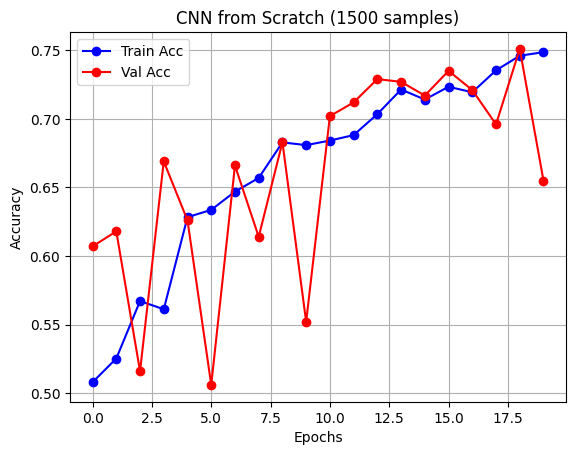

In [8]:
plt.plot(history.history['accuracy'], 'bo-', label="Train Acc")
plt.plot(history.history['val_accuracy'], 'ro-', label="Val Acc")
plt.title("CNN from Scratch (1500 samples)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# CNN - 2000 Samples

In [9]:
train_ds = full_train_ds.take(63)  # ~2000 samples

model = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(train_ds, epochs=20, validation_data=validation_ds)
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy CNN 2000 samples: {test_acc:.3f}")

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.5111 - loss: 0.7371 - val_accuracy: 0.5000 - val_loss: 0.7425
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5143 - loss: 0.6967 - val_accuracy: 0.5170 - val_loss: 0.6839
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.6010 - loss: 0.6983 - val_accuracy: 0.6340 - val_loss: 0.6391
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5995 - loss: 0.6650 - val_accuracy: 0.5520 - val_loss: 0.6922
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.6371 - loss: 0.6364 - val_accuracy: 0.5900 - val_loss: 0.6725
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6486 - loss: 0.6478 - val_accuracy: 0.5390 - val_loss: 0.8473
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.6578 - loss: 0.6266 - val_accuracy: 0.6320 - val_loss: 0.6553
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.7030 - loss: 0.5962 - val_accuracy: 0.6540 - v

# Plot CNN Accuracy (2000 samples)

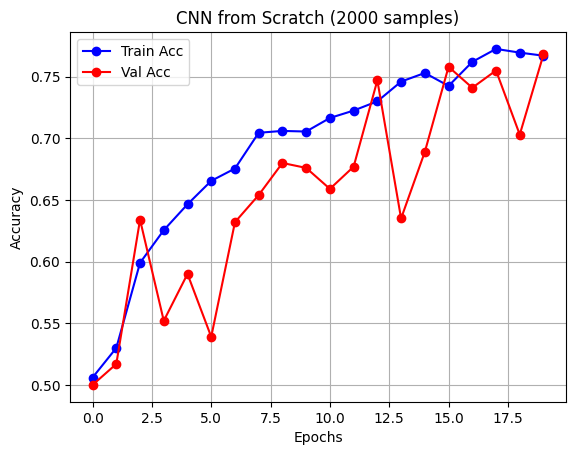

In [10]:
plt.plot(history.history['accuracy'], 'bo-', label="Train Acc")
plt.plot(history.history['val_accuracy'], 'ro-', label="Val Acc")
plt.title("CNN from Scratch (2000 samples)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# VGG16 – 1000 Samples

In [11]:
train_ds = full_train_ds.take(32)  # ~1000 samples

# Data Augmentation
data_aug = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

# Load base model
conv_base = keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)
conv_base.trainable = False  # Freeze pretrained layers

# Build model
inputs = keras.Input(shape=(180, 180, 3))
x = data_aug(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

# Compile model with learning rate tuning
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Early stopping
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
]

# Train
history = model.fit(train_ds, epochs=20, validation_data=validation_ds, callbacks=callbacks)

# Evaluate
test_loss, test_acc = model.evaluate(test_ds)
print(f"VGG16 (1000 samples) Test Accuracy: {test_acc:.3f}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 234ms/step - accuracy: 0.5824 - loss: 6.6830 - val_accuracy: 0.7920 - val_loss: 1.9963
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.6816 - loss: 3.6027 - val_accuracy: 0.8760 - val_loss: 1.2569
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.7632 - loss: 2.5682 - val_accuracy: 0.9050 - val_loss: 0.9847
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.8025 - loss: 2.1565 - val_accuracy: 0.9260 - val_loss: 0.8253
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.8530 - loss: 1.5135 - val_accuracy: 0.9310 - val_loss: 0.7369
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 262ms/step - accuracy: 0.8859 - loss: 1.2784 - val_accuracy: 0.9370 - val_loss: 0.6700
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.8627 - loss: 1.7421 - val_accuracy: 0.9380 - val_loss: 0.6304
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step

# Plot Accuracy for 1000 Samples

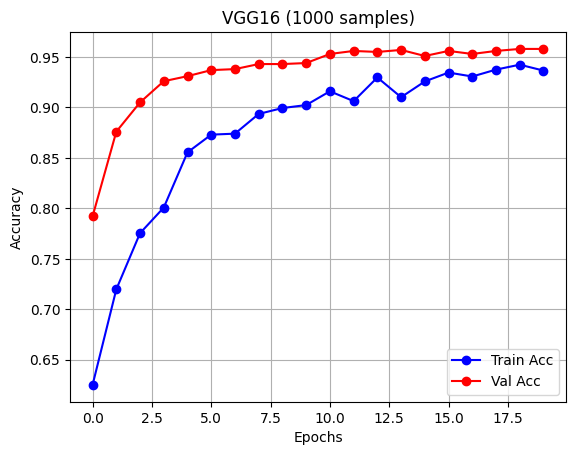

In [12]:
plt.plot(history.history['accuracy'], 'bo-', label='Train Acc')
plt.plot(history.history['val_accuracy'], 'ro-', label='Val Acc')
plt.title("VGG16 (1000 samples)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# VGG16 – 1500 Samples

In [13]:
train_ds = full_train_ds.take(47)  # ~1500 samples

conv_base.trainable = False  # Re-freeze if needed

inputs = keras.Input(shape=(180, 180, 3))
x = data_aug(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(1e-5),
              loss="binary_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
]

history = model.fit(train_ds, epochs=20, validation_data=validation_ds, callbacks=callbacks)

test_loss, test_acc = model.evaluate(test_ds)
print(f"VGG16 (1500 samples) Test Accuracy: {test_acc:.3f}")

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.5466 - loss: 6.9906 - val_accuracy: 0.8560 - val_loss: 1.0636
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - accuracy: 0.7544 - loss: 3.1172 - val_accuracy: 0.9220 - val_loss: 0.5192
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.8027 - loss: 1.9083 - val_accuracy: 0.9490 - val_loss: 0.3747
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.8415 - loss: 1.5422 - val_accuracy: 0.9580 - val_loss: 0.3101
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.8482 - loss: 1.4130 - val_accuracy: 0.9600 - val_loss: 0.2701
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.8761 - loss: 1.2812 - val_accuracy: 0.9610 - val_loss: 0.2565
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - accuracy: 0.8912 - loss: 1.2111 - val_accuracy: 0.9630 - val_loss: 0.2410
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.9117 - loss: 0.8664 - val_accuracy

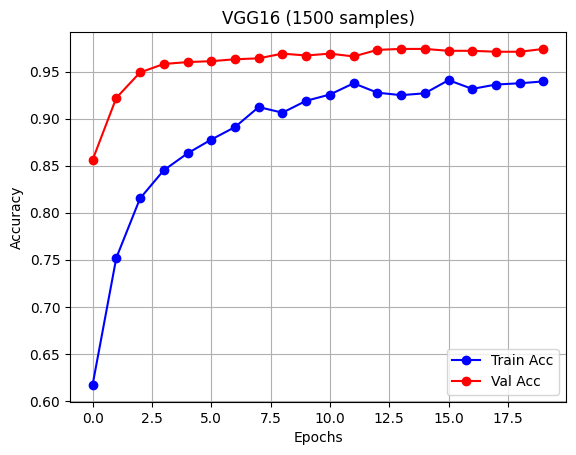

In [14]:
plt.plot(history.history['accuracy'], 'bo-', label='Train Acc')
plt.plot(history.history['val_accuracy'], 'ro-', label='Val Acc')
plt.title("VGG16 (1500 samples)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# VGG16 – 2000 Samples

In [15]:
train_ds = full_train_ds.take(63)  # ~2000 samples

conv_base.trainable = False

inputs = keras.Input(shape=(180, 180, 3))
x = data_aug(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(1e-5),
              loss="binary_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
]

history = model.fit(train_ds, epochs=20, validation_data=validation_ds, callbacks=callbacks)

test_loss, test_acc = model.evaluate(test_ds)
print(f"VGG16 (2000 samples) Test Accuracy: {test_acc:.3f}")


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.6359 - loss: 5.1452 - val_accuracy: 0.8790 - val_loss: 1.1770
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.7695 - loss: 2.5916 - val_accuracy: 0.9250 - val_loss: 0.7692
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.8585 - loss: 1.5701 - val_accuracy: 0.9390 - val_loss: 0.6354
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.8844 - loss: 1.2081 - val_accuracy: 0.9440 - val_loss: 0.5564
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.8938 - loss: 1.1154 - val_accuracy: 0.9480 - val_loss: 0.5095
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.9076 - loss: 0.7909 - val_accuracy: 0.9520 - val_loss: 0.4702
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.9136 - loss: 0.9025 - val_accuracy: 0.9530 - val_loss: 0.4330
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.9243 - loss: 0.6931 - val_accuracy

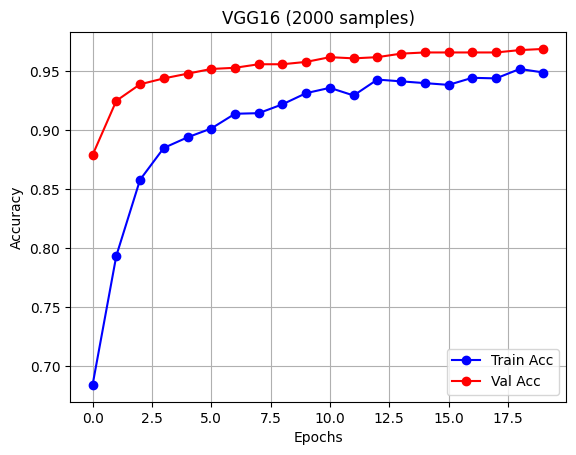

In [16]:
plt.plot(history.history['accuracy'], 'bo-', label='Train Acc')
plt.plot(history.history['val_accuracy'], 'ro-', label='Val Acc')
plt.title("VGG16 (2000 samples)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()